#Laboratório 3

###Questão 1

Carregue o dataset breast cancer disponível no sklearn e obtenha a distribuição de classes deste
dataset.


In [9]:
from sklearn import datasets
import pandas as pd

breast_cancer = datasets.load_breast_cancer()

#separação entre características e classificação
cancer_X = breast_cancer.data
cancer_y = breast_cancer.target

#print(cancer_X)
#print(cancer_y)

In [12]:
import numpy as np

def classDistribution(data_y):

  tam = len(data_y)
  #obter as classificações
  labels = np.unique(data_y)
  #print(labels)

  classDistr = []

  for class_value in labels:   
    cvc = len([1 for i in data_y if i == class_value])
    classDistr += [(class_value, cvc/tam)]

  return classDistr


classDistribution(cancer_y)

[(0, 0.37258347978910367), (1, 0.6274165202108963)]

In [13]:
#fazendo com dataFrame
from sklearn.datasets import load_breast_cancer
import pandas as pd

bc = load_breast_cancer(as_frame=True)
df = pd.DataFrame(bc['data'])
df['target'] = bc['target']

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [16]:
dist = df['target'].value_counts(normalize=True)

print(f"Classe 0: {dist[0]*100 : .2f} %")
print(f"Classe 1:{dist[1]*100 : .2f} %")

Classe 0:  37.26 %
Classe 1: 62.74 %


###Questão 2

Use o classificador Vizinho Mais Próximo e uma divisão percentual com 30% dos exemplos do
dataset breast cancer usados para teste para obter o valor da acurácia e f1 macro, f1 micro e f1
weighted deste classificador neste dataset.

In [4]:
from sklearn.model_selection import train_test_split

#separar a base em treino e teste
X_train, X_test,y_train,y_test = train_test_split(cancer_X,cancer_y,
                                        test_size=0.3, random_state=0)

#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

#criando o classificador
oneNN = KNeighborsClassifier(n_neighbors=1)
oneNN.fit(X_train,y_train)

#o que deveria ser a saida
print(y_test)
print('\n')
#o que foi a saida
y_predito = oneNN.predict(X_test)
print(y_predito)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1]


[1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1]


In [17]:
#acurácia - faz a predição e mede o quanto acertou
print("acuracia - mod 1 = ", oneNN.score(X_test,y_test))

from sklearn.metrics import accuracy_score, balanced_accuracy_score,f1_score

#outra forma de calcular acuracia
print("acuracia - mod 2 = ", accuracy_score(y_predito,y_test))

#print("balanced accuracy score: %.2f\n" % balanced_accuracy_score(y_predito, y_test))


#f1 macro
print("macro: %.2f" % f1_score(y_predito, y_test, average='macro'))
#f1 micro 
print("micro: %.2f" % f1_score(y_predito, y_test, average='micro'))
#f1 weighted 
print("weighted: %.2f\n" % f1_score(y_predito, y_test, average='weighted'))

acuracia - mod 1 =  0.9181286549707602
acuracia - mod 2 =  0.9181286549707602
macro: 0.91
micro: 0.92
weighted: 0.92



###Questão 3

Use o classificador Vizinho Mais Próximo e uma validação cruzada estratificada com 10 folds no
dataset breast cancer para obter a matriz de confusão, a acurácia, o desvio padrão, o intervalo de
confiança a 95%, a precision micro, o recall micro e a f1 macro deste classificador neste dataset.

In [44]:

from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate

scores = cross_val_score(oneNN, cancer_X,cancer_y, cv=10)
#scores = metricas obtidas
#print(scores)

#validação cruzada escolhendo os scores a serem calculados
scorings = ['accuracy', 'precision_micro', 'recall_micro', 'f1_macro']
scores = cross_validate(oneNN,cancer_X,cancer_y, scoring=scorings, cv=10)

#predição com 10 folds
y_pred_10 = cross_val_predict(oneNN, cancer_X,cancer_y,cv=10)

#saida real
#print(cancer_y)
#saida prevista
#print(y_pred_10)

from scipy import stats

scores_acc = scores['test_accuracy']
mean = scores_acc.mean()
std = scores_acc.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores_acc)))
print("\nMedia Acurácia: %0.2f Desvio Padrão: %0.2f" % (mean, std))
print ("Intervalo de confiança da acurácia (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup))

scores_prec = scores['test_precision_micro']
mean = scores_prec.mean()
std = scores_prec.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores_prec)))
print("\nMedia Micro Precision: %0.2f Desvio Padrão: %0.2f" % (mean, std))
print ("Intervalo de confiança da Micro Precision (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup))

scores_rec = scores['test_recall_micro']
mean = scores_rec.mean()
std = scores_rec.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores_rec)))
print("\nMedia Micro Recall: %0.2f Desvio Padrão: %0.2f" % (mean, std))
print ("Intervalo de confiança Micro Recall (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup))

scores_f1 = scores['test_f1_macro']
mean = scores_f1.mean()
std = scores_f1.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores_f1)))
print("\nMedia Macro F1: %0.2f Desvio Padrão: %0.2f" % (mean, std))
print ("Intervalo de Confiança Macro F1 (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup))


Media Acurácia: 0.92 Desvio Padrão: 0.03
Intervalo de confiança da acurácia (95%): (0.90, 0.93)


Media Micro Precision: 0.92 Desvio Padrão: 0.03
Intervalo de confiança da Micro Precision (95%): (0.90, 0.93)


Media Micro Recall: 0.92 Desvio Padrão: 0.03
Intervalo de confiança Micro Recall (95%): (0.90, 0.93)


Media Macro F1: 0.91 Desvio Padrão: 0.03
Intervalo de Confiança Macro F1 (95%): (0.89, 0.93)



[[182  30]
 [ 18 339]]


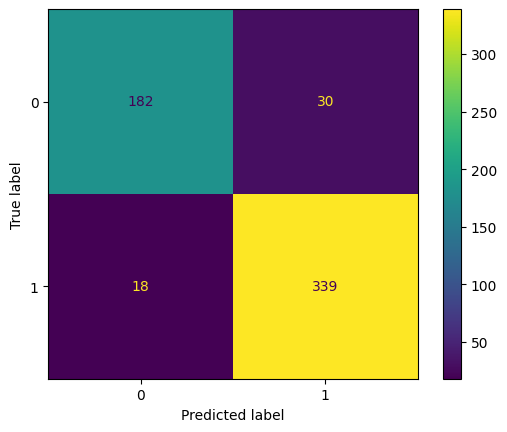

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matriz_conf = confusion_matrix(cancer_y,y_pred_10)
print(matriz_conf)

#impressão gráfica
disp = ConfusionMatrixDisplay(matriz_conf, display_labels=oneNN.classes_).plot()

###Questão 4

Use o classificador K Vizinhos Mais Próximos com o método de validação cruzada com busca
em grade (use 10 partições) no dataset breast cancer para realizar a busca pelo melhor valor de K.
Apresente a melhor acurácia obtida, o desvio padrão, o intervalo de confiança a 95% e o valor de K
correspondente.



In [60]:
from sklearn.model_selection import GridSearchCV

kNN = KNeighborsClassifier()

#vamos testar com os hiperparâmetros de 1,3 e 5 vizinhos mais prox
grade = {'n_neighbors' : list(range(1,10))}

gs = GridSearchCV(estimator = kNN, param_grid = grade,
                  scoring = 'accuracy', cv = 10)

gs = gs.fit(cancer_X,cancer_y)

print("Best Parameter Values: ", gs.best_params_)
print("Best Mean Accuracy: %0.2f" % gs.best_score_)

#não entendi mt bem essa parte final

best = gs.best_params_['n_neighbors'] - 1


scores = np.array ([gs.cv_results_['split0_test_score'][best], 
                      gs.cv_results_['split1_test_score'][best], 
                      gs.cv_results_['split2_test_score'][best], 
                      gs.cv_results_['split3_test_score'][best], 
                      gs.cv_results_['split4_test_score'][best], 
                      gs.cv_results_['split5_test_score'][best], 
                      gs.cv_results_['split6_test_score'][best], 
                      gs.cv_results_['split7_test_score'][best], 
                      gs.cv_results_['split8_test_score'][best], 
                      gs.cv_results_['split9_test_score'][best]])


mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores)))

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % (inf, sup)) 

Best Parameter Values:  {'n_neighbors': 8}
Best Mean Accuracy: 0.93

Mean Accuracy: 0.93 Standard Deviation: 0.03
Accuracy Confidence Interval (95%): (0.91, 0.95)



###Questão 5

Use o classificador K Vizinhos Mais Próximos no dataset breast cancer para obter seu
desempenho estimando o melhor valor de K em cada partição da validação cruzada com 10
partições mas sem possibilidade de superajuste. Repita o procedimento por 3 vezes. Apresente a
melhor acurácia obtida, o desvio padrão e o intervalo de confiança a 95%.

In [65]:
from sklearn.model_selection import RepeatedStratifiedKFold


gs = GridSearchCV(estimator = kNN, param_grid = grade,
                  scoring = 'accuracy', cv = 10)

#repetir 3x o procedimento - dividirá os 10 folds de maneira diferente
rkf = RepeatedStratifiedKFold (n_splits = 10, n_repeats=3)

scores = cross_val_score(gs,cancer_X,cancer_y,
                         scoring='accuracy', cv =rkf)

#print(scores)

mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores)))


print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup)) 



Mean Accuracy: 0.93 Standard Deviation: 0.03
Accuracy Confidence Interval (95%): (0.92, 0.94)



###Questão 6

Repita o procedimento proposto no exercício 5 somente trocando o classificador para uma
Árvore de Decisão. Compare o desempenho obtido pelo K Vizinhos Mais Próximos com a Árvore
de Decisão utilizando o teste T e o de Wilcoxon.

In [67]:
from sklearn.tree import DecisionTreeClassifier

dT = DecisionTreeClassifier()

              # profundidade max ,  num min de amostras para dividir um nó
parameters = {'max_depth': [2, 3], 'min_samples_split': [2, 4]}


gs = GridSearchCV(estimator = dT, param_grid = parameters,
                  scoring = 'accuracy', cv = 10)

#repetir 3x o procedimento - dividirá os 10 folds de maneira diferente
rkf = RepeatedStratifiedKFold (n_splits = 10, n_repeats=3)

dTscores = cross_val_score(gs,cancer_X,cancer_y,
                         scoring='accuracy', cv =rkf)

#print(dTscores)

mean = dTscores.mean()
std = dTscores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(dTscores)))


print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup)) 


Mean Accuracy: 0.92 Standard Deviation: 0.03
Accuracy Confidence Interval (95%): (0.91, 0.93)



In [70]:
from scipy.stats import ttest_rel,wilcoxon

print("teste T")
s,p = ttest_rel(scores,dTscores)
print("t: %0.2f p-value: %0.2f\n" % (s,p))

print("teste Wilcoxon")
s,p = wilcoxon (scores,dTscores)
print("w: %0.2f p-value: %0.2f\n" % (s,p))

teste T
t: 1.51 p-value: 0.14

teste Wilcoxon
w: 111.50 p-value: 0.10

